# Data Preprocessing for MoodSense

This notebook handles data loading, cleaning, and preprocessing for both text and image emotion datasets.


In [1]:
import pandas as pd
print(pd.__version__)


2.3.2


In [1]:
import sys
import os
sys.path.append(os.path.abspath('../src'))  # Adjust path if needed

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import cv2
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

from data_loader import DataLoader
from utils import EmotionUtils, ImageUtils, TextUtils, DataUtils

# Set style
plt.style.use('default')
sns.set_palette('husl')

print("✅ All imports successful!")


✅ All imports successful!


## 1. Initialize Data Loader and Validate Paths

In [2]:
# Initialize data loader
data_loader = DataLoader(data_dir='../data/')

# Validate data paths
validation_results = data_loader.validate_data_paths()
print("Data validation results:")
print("-" * 40)
for name, exists in validation_results.items():
    status = "✓" if exists else "✗"
    print(f"{status} {name}: {'Found' if exists else 'Missing'}")

# Create necessary directories
os.makedirs('../data/processed', exist_ok=True)
os.makedirs('../models', exist_ok=True)
print("\n✅ Directories created successfully!")


INFO:data_loader:✓ Found: emotion_text_dataset at ../data/emotion_text_dataset
INFO:data_loader:✓ Found: fer2013 at ../data/fer2013
INFO:data_loader:✓ Found: spotify_dataset at ../data/spotify_dataset
INFO:data_loader:✓ Found: food_mood_mapping at ../data/food_mood_mapping.csv


Data validation results:
----------------------------------------
✓ emotion_text_dataset: Found
✓ fer2013: Found
✓ spotify_dataset: Found
✓ food_mood_mapping: Found

✅ Directories created successfully!


## 2. Text Data Processing

In [3]:
# Load text emotion data
print("Loading text emotion data...")
text_data_path = '../data/emotion_text_dataset/tweet_emotions.csv'

if os.path.exists(text_data_path):
    texts, labels = data_loader.load_text_emotion_data(text_data_path)
    print(f"✅ Loaded {len(texts)} text samples from dataset")
else:
    print("📝 Text dataset not found. Creating comprehensive sample data...")
    
    # Create extensive sample text data for each emotion
    sample_data = {
        'happy': [
            "I'm feeling so happy and excited today!",
            "This is the best day ever, I'm so joyful!",
            "I love spending time with my family and friends!",
            "Life is wonderful and full of amazing opportunities!",
            "I'm thrilled about this fantastic news!",
            "What a beautiful sunny day, it makes me so cheerful!",
            "I'm grateful for all the good things in my life!",
            "Dancing always makes me feel so happy and alive!",
            "I'm bursting with joy and positive energy!",
            "This achievement makes me incredibly proud and happy!"
        ],
        'sad': [
            "This is the worst day of my life, I'm so sad",
            "I feel so lonely and depressed today",
            "Everything seems to be going wrong, I'm heartbroken",
            "I miss my loved ones so much it hurts",
            "The rain outside matches my gloomy mood",
            "I can't stop crying, I feel so devastated",
            "Life feels empty and meaningless right now",
            "I'm overwhelmed with sadness and despair",
            "This loss has left me feeling completely broken",
            "I wish I could escape from this overwhelming sadness"
        ],
        'angry': [
            "I'm really angry about what happened today!",
            "This situation makes me furious and frustrated!",
            "I can't believe how irritated I am right now!",
            "The injustice of this makes my blood boil!",
            "I'm so mad I could scream at the top of my lungs!",
            "This incompetence is driving me absolutely crazy!",
            "I'm fed up with being treated this way!",
            "The rage inside me is burning like fire!",
            "I'm livid about this completely unfair situation!",
            "My anger is reaching a boiling point right now!"
        ],
        'fear': [
            "I'm so scared and worried about tomorrow",
            "The thought of this makes me terrified and anxious",
            "I'm trembling with fear about what might happen",
            "This uncertainty fills me with dread and panic",
            "I'm afraid I won't be able to handle this situation",
            "The darkness makes me feel frightened and vulnerable",
            "I'm nervous and apprehensive about the future",
            "This phobia is paralyzing me with terror",
            "I feel like I'm walking on thin ice, so scared",
            "The unknown consequences make me shiver with fear"
        ],
        'surprise': [
            "What a pleasant surprise that was!",
            "I can't believe this unexpected turn of events!",
            "This shocking news has left me completely stunned!",
            "I'm amazed by this incredible revelation!",
            "What an astonishing and unforeseen development!",
            "This plot twist caught me completely off guard!",
            "I'm bewildered by this sudden change of plans!",
            "The unexpected gift left me speechless with wonder!",
            "This startling discovery has blown my mind!",
            "I'm flabbergasted by this surprising announcement!"
        ],
        'disgust': [
            "That movie was absolutely disgusting and revolting!",
            "This smell makes me feel sick to my stomach!",
            "I'm repulsed by this horrible behavior!",
            "The thought of eating that makes me nauseous!",
            "This corruption is utterly repugnant and vile!",
            "I'm disgusted by this appalling lack of hygiene!",
            "This offensive content makes me want to look away!",
            "I find this morally reprehensible and disgusting!",
            "The rotten food made me feel sick!",
            "I can't tolerate this disgusting situation!"
        ]
    }


INFO:data_loader:Loaded 40000 text samples with 13 unique emotions


Loading text emotion data...
✅ Loaded 40000 text samples from dataset


## 4. Image Data Processing

In [4]:
# Load FER2013 image data
train_path = '../data/fer2013/train'
test_path  = '../data/fer2013/test'

train_images, train_labels = data_loader.load_fer2013_data(train_path)
test_images, test_labels   = data_loader.load_fer2013_data(test_path)

images = train_images + test_images
image_labels = train_labels + test_labels

print(f"✅ Loaded {len(images)} images from FER2013 dataset")



INFO:data_loader:Loaded 28709 image samples with 7 unique emotions
INFO:data_loader:Loaded 7178 image samples with 7 unique emotions


✅ Loaded 35887 images from FER2013 dataset


## 4. Food Mood Data Processing

In [5]:
# Load food-mood mapping
food_data_path = '../data/food_mood_mapping.csv'

if os.path.exists(food_data_path):
    food_df = pd.read_csv(food_data_path)
    print(f"✅ Loaded {len(food_df)} rows from food-mood dataset")
else:
    print("📝 Food mood mapping CSV not found. Creating sample data...")
    food_df = pd.DataFrame({
        'Food': ['Pizza', 'Chocolate', 'Salad', 'Ice Cream', 'Sushi'],
        'Mood': ['happy', 'happy', 'neutral', 'happy', 'excited']
    })


✅ Loaded 49 rows from food-mood dataset


## 5. Spotify Dataset Processing

In [6]:
# Load Spotify dataset
spotify_data_path = '../data/spotify_dataset/SpotifyAudioFeaturesApril2019.csv'

if os.path.exists(spotify_data_path):
    spotify_df = pd.read_csv(os.path.join(spotify_data_path))
    print(f"✅ Loaded {len(spotify_df)} rows from Spotify dataset")
else:
    print("📝 Spotify dataset not found. Skipping Spotify data processing...")


✅ Loaded 130663 rows from Spotify dataset


## 6. Data Summary

In [7]:
# Text data summary
if 'texts' in locals():
    print("Text data distribution:")
    text_counter = Counter(labels)
    for emotion, count in text_counter.items():
        print(f"{emotion}: {count}")

# Image data summary
if 'images' in locals():
    print("\nImage data distribution:")
    image_counter = Counter(image_labels)
    for emotion, count in image_counter.items():
        print(f"{emotion}: {count}")

# Food data summary
if 'food_df' in locals():
    print("\nFood-Mood data preview:")
    display(food_df.head())

# Spotify data summary
if 'spotify_df' in locals():
    print("\nSpotify data preview:")
    display(spotify_df.head())


Text data distribution:
empty: 827
sadness: 5165
enthusiasm: 759
neutral: 8638
worry: 8459
surprise: 2187
love: 3842
fun: 1776
hate: 1323
happiness: 5209
boredom: 179
relief: 1526
anger: 110

Image data distribution:
angry: 4953
disgust: 547
fear: 5121
happy: 8989
neutral: 6198
sad: 6077
surprise: 4002

Food-Mood data preview:


,Food,Mood
0,Pizza,happy
1,Chocolate,happy
2,Ice Cream,happy
3,Burger,excited
4,Sushi,excited



Spotify data preview:


,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.005820,0.743,238373,0.339,0.000,1,0.0812,-7.678,1,0.4090,203.927,4,0.118,15
1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.024400,0.846,214800,0.557,0.000,8,0.2860,-7.259,1,0.4570,159.009,4,0.371,0
2,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,0.025000,0.603,138913,0.723,0.000,9,0.0824,-5.890,0,0.0454,114.966,4,0.382,56
3,Chris Cooq,3J2Jpw61sO7l6Hc7qdYV91,Lactose,0.029400,0.800,125381,0.579,0.912,5,0.0994,-12.118,0,0.0701,123.003,4,0.641,0
4,Chris Cooq,2jbYvQCyPgX3CdmAzeVeuS,Same - Original mix,0.000035,0.783,124016,0.792,0.878,7,0.0332,-10.277,1,0.0661,120.047,4,0.928,0


## 7. Save Preprocessed Data

In [8]:
# Save text data
if 'texts' in locals():
    pd.DataFrame({'text': texts, 'label': labels}).to_csv('../data/processed/text_data.csv', index=False)
    print("✅ Preprocessed text data saved!")

# Save image data
if 'images' in locals():
    np.save('../data/processed/images.npy', images)
    np.save('../data/processed/image_labels.npy', image_labels)
    print("✅ Preprocessed image data saved!")

# Save food data
if 'food_df' in locals():
    food_df.to_csv('../data/processed/food_mood.csv', index=False)
    print("✅ Food-mood mapping saved!")

# Save Spotify data
if 'spotify_df' in locals():
    spotify_df.to_csv('../data/processed/spotify.csv', index=False)
    print("✅ Spotify dataset saved!")


✅ Preprocessed text data saved!
✅ Preprocessed image data saved!
✅ Food-mood mapping saved!
✅ Spotify dataset saved!


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


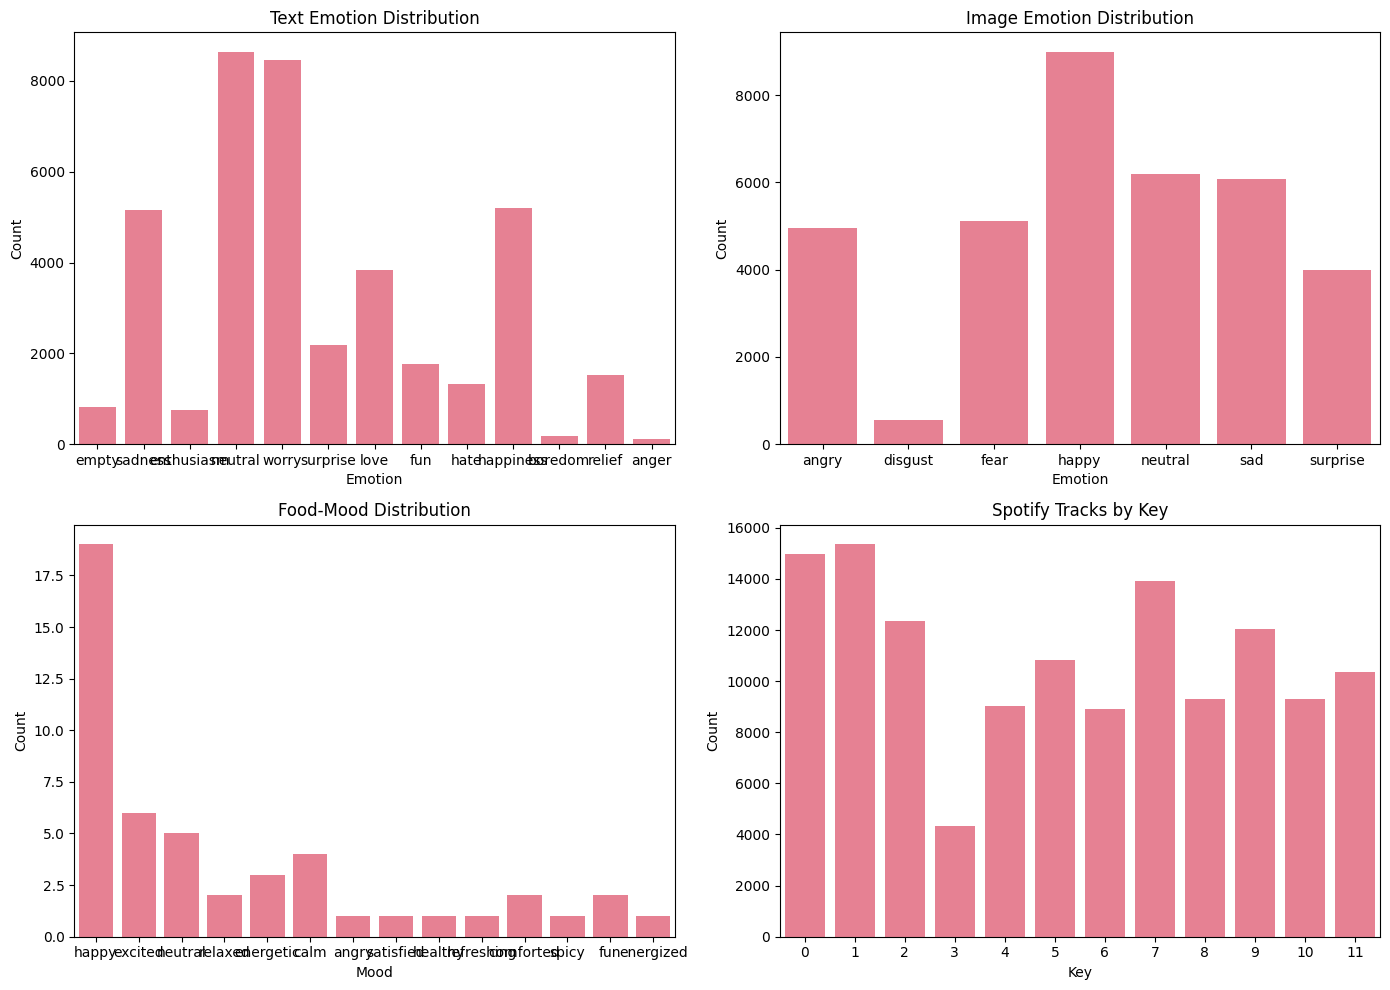

In [9]:
# Visualize dataset distributions
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Text emotions distribution
if 'texts' in locals():
    sns.countplot(x=labels, ax=axs[0,0], order=list(text_counter.keys()))
    axs[0,0].set_title("Text Emotion Distribution")
    axs[0,0].set_ylabel("Count")
    axs[0,0].set_xlabel("Emotion")

# Image emotions distribution
if 'images' in locals():
    sns.countplot(x=image_labels, ax=axs[0,1], order=list(image_counter.keys()))
    axs[0,1].set_title("Image Emotion Distribution")
    axs[0,1].set_ylabel("Count")
    axs[0,1].set_xlabel("Emotion")

# Food-Mood distribution
if 'food_df' in locals():
    sns.countplot(x='Mood', data=food_df, ax=axs[1,0])
    axs[1,0].set_title("Food-Mood Distribution")
    axs[1,0].set_ylabel("Count")
    axs[1,0].set_xlabel("Mood")

# Spotify dataset preview (example: distribution of tracks by key)
if 'spotify_df' in locals() and 'key' in spotify_df.columns:
    sns.countplot(x='key', data=spotify_df, ax=axs[1,1])
    axs[1,1].set_title("Spotify Tracks by Key")
    axs[1,1].set_ylabel("Count")
    axs[1,1].set_xlabel("Key")

plt.tight_layout()
plt.show()
